In [1]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 2. Đọc dữ liệu
df = pd.read_csv('data_gia.csv')
df.head()


,Diện tích (m2),Số phòng ngủ,Số phòng tắm,Năm xây dựng,Vị trí (Mã vùng),Giá bán (VNĐ)
0,132,2,1,1950,55156,608758809
1,136,4,3,2003,55156,822421566
2,101,1,1,1996,55123,507978846
3,218,4,3,1988,55111,742000789
4,50,2,1,1979,55106,350159109


In [2]:
# 3. Thông tin dữ liệu
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Diện tích (m2)    5000 non-null   int64
 1   Số phòng ngủ      5000 non-null   int64
 2   Số phòng tắm      5000 non-null   int64
 3   Năm xây dựng      5000 non-null   int64
 4   Vị trí (Mã vùng)  5000 non-null   int64
 5   Giá bán (VNĐ)     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


,Diện tích (m2),Số phòng ngủ,Số phòng tắm,Năm xây dựng,Vị trí (Mã vùng),Giá bán (VNĐ)
count,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5.000000e+03
mean,164.077800,2.983200,1.9996,1987.088200,55130.192200,6.482108e+08
std,77.227978,1.422717,0.8115,21.844035,29.286468,1.690088e+08
min,30.000000,1.000000,1.0000,1950.000000,55106.000000,1.614531e+08
25%,98.000000,2.000000,1.0000,1968.000000,55109.000000,5.236372e+08
50%,165.000000,3.000000,2.0000,1987.000000,55111.000000,6.485212e+08
75%,230.000000,4.000000,3.0000,2006.000000,55156.000000,7.704798e+08
max,299.000000,5.000000,3.0000,2024.000000,55199.000000,1.111256e+09


In [3]:
# 4. Kiểm tra giá trị thiếu (nếu có)
df.isnull().sum()

Diện tích (m2)      0
Số phòng ngủ        0
Số phòng tắm        0
Năm xây dựng        0
Vị trí (Mã vùng)    0
Giá bán (VNĐ)       0
dtype: int64

In [4]:
# 5. Tiền xử lý dữ liệu

# Chuyển đổi cột dạng object -> mã hóa số (LabelEncoder)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Diện tích (m2),Số phòng ngủ,Số phòng tắm,Năm xây dựng,Vị trí (Mã vùng),Giá bán (VNĐ)
0,132,2,1,1950,55156,608758809
1,136,4,3,2003,55156,822421566
2,101,1,1,1996,55123,507978846
3,218,4,3,1988,55111,742000789
4,50,2,1,1979,55106,350159109


In [5]:
# 6. Tách tập dữ liệu thành X (đặc trưng) và y (giá nhà)
X = df.drop('Giá bán (VNĐ)', axis=1)
y = df['Giá bán (VNĐ)']


In [6]:
# 7. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 8. Huấn luyện mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# 9. Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

# Các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE và độ chính xác tương đối (%)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

# In kết quả
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Độ chính xác tương đối: {accuracy:.2f}%")

MSE: 18842246014571428.00
RMSE: 137267060.92
R² Score: 0.33
MAPE: 19.40%
Độ chính xác tương đối: 80.60%


In [9]:
save_dir = "exported_model"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, "random_forest_model.pkl")
joblib.dump(model, model_path)

print(f"Mô hình đã được lưu vào file: '{model_path}'")

Mô hình đã được lưu vào file: 'exported_model\random_forest_model.pkl'


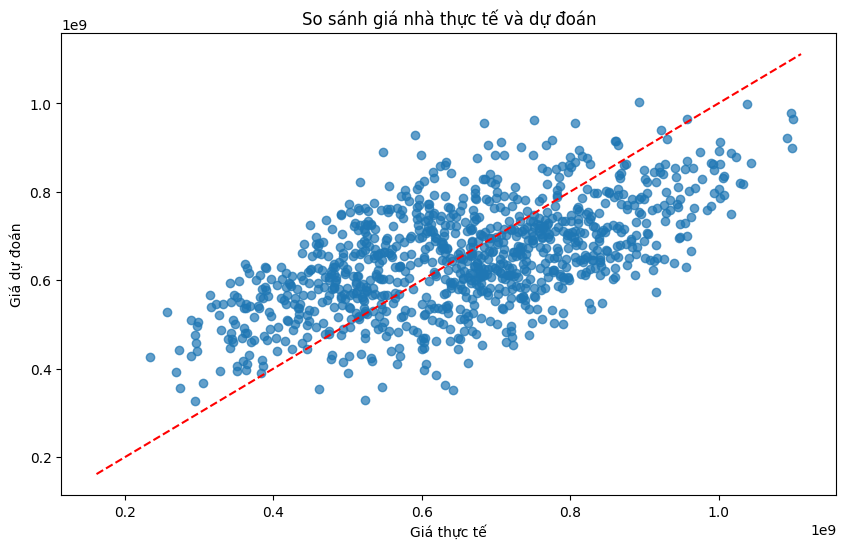

In [10]:
# 10. Hiển thị biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('So sánh giá nhà thực tế và dự đoán')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
